# NEC winter-school: third exercise

In this notebook, we will learn how to finetune a model. To do that, we will take the model that we previously trained in MNIST and finetune it in Fashion-MNIST.

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow import keras
import numpy as np                     # Basic array operation library
import matplotlib.pyplot as plt        # For plotting and displaying
%matplotlib inline

This time we want to train a model that works on Fashion-MNIST. So the first step is to prepare the dataset.

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0         # Rescale the image values to [0,1], as we did before

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

Display a grid of 5x5 digits:

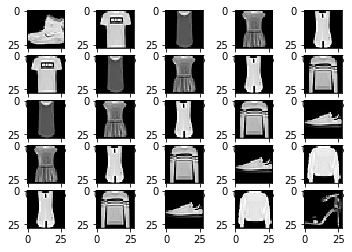

In [6]:
# Add code
for ix in range(5):
    for ij in range(5):
        plt.subplot(5,5,1 + ix + ij*5)
        im = x_train[ix + ij, :, :, 0]
        plt.imshow(im, cmap='gray')

Print the 25 first labels:

In [7]:
print(y_train[0:25])

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4]


Copy your class model, but replace your last layer.

In [8]:
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(32, 3, activation='relu')
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(2, activation='relu')
        self.d3 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        x = self.d2(x)
        return self.d3(x)

    def get_emb(self, x):
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)


In [9]:
# Create an instance of the model
model = MyModel()

# Built the model
model.build((None,28,28,1))  # This is needed to initialize the shapes of the layers

Now we have to load the weights of the model that we previously trained.

In [10]:
model.load_weights('mnist_model.h5')

Once we have the weights loaded, we are going to modify the output layer by randomly assigning new weights to it.

In [11]:
model.d3.weights[0] = np.random.randn(2,10) * 0.02
model.d3.weights[1] = np.zeros((10))

Now we can compile the model and get ready to train it.

In [12]:
model.compile(optimizer='adam',                         # Optimizer
              loss='sparse_categorical_crossentropy',   # Loss function
              metrics=['accuracy'])                     # Test metric to control that everything is working well

# Train
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 42s 699us/sample - loss: 1.2842 - accuracy: 0.6714
Epoch 2/5
60000/60000 [==============================] - 41s 688us/sample - loss: 0.7221 - accuracy: 0.8157
Epoch 3/5
60000/60000 [==============================] - 42s 698us/sample - loss: 0.5754 - accuracy: 0.8545
Epoch 4/5
60000/60000 [==============================] - 42s 706us/sample - loss: 0.4632 - accuracy: 0.8748
Epoch 5/5
60000/60000 [==============================] - 43s 721us/sample - loss: 0.4046 - accuracy: 0.8856


Let's save the model.

In [13]:
model.save_weights('fashion-mnist_model.h5')

We test the model:

In [14]:
model.evaluate(x_test,  y_test, verbose=2)

10000/1 - 2s - loss: 0.3993 - accuracy: 0.8649


[0.5227723756313324, 0.8649]

Try to train the model from scratch. Do you see any difference?

In [15]:
model_scratch = MyModel()

model.compile(optimizer='adam',                         # Optimizer
              loss='sparse_categorical_crossentropy',   # Loss function
              metrics=['accuracy'])                     # Test metric to control that everything is working well

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 43s 713us/sample - loss: 0.3634 - accuracy: 0.8937
Epoch 2/5
60000/60000 [==============================] - 46s 765us/sample - loss: 0.3274 - accuracy: 0.9040
Epoch 3/5
60000/60000 [==============================] - 43s 725us/sample - loss: 0.2990 - accuracy: 0.9116
Epoch 4/5
60000/60000 [==============================] - 43s 713us/sample - loss: 0.2739 - accuracy: 0.9186
Epoch 5/5
60000/60000 [==============================] - 43s 721us/sample - loss: 0.2583 - accuracy: 0.9229
10000/1 - 2s - loss: 0.3887 - accuracy: 0.8714


[0.5446069560050965, 0.8714]